In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SCALE.csv")
df

PLATE_NO         ROLLING_DATE          SCALE        SPEC STEEL_KIND  \
0    PB562774  2008-08-01:00:00:15  Non-Defective  AB/EH32-TM         T1   
1    PB562775  2008-08-01:00:00:16  Non-Defective  AB/EH32-TM         T1   
2    PB562776  2008-08-01:00:00:59  Non-Defective   NV-E36-TM         T8   
3    PB562777  2008-08-01:00:01:24  Non-Defective   NV-E36-TM         T8   
4    PB562778  2008-08-01:00:01:44  Non-Defective  BV-EH36-TM         T8   
..        ...                  ...            ...         ...        ...   
715  PB563502  2008-08-02:13:35:36      Defective       NK-KA         C0   
716  PB563503  2008-08-02:13:35:02  Non-Defective      NV-A32         C0   
717  PB563504  2008-08-02:14:40:00  Non-Defective      NV-A32         C0   
718  PB563505  2008-08-02:13:35:19  Non-Defective        LR-A         C0   
719  PB563506  2008-08-02:14:40:53  Non-Defective      GL-A32         C0   

     PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO  ...  FUR_HZ_TEMP  FUR_HZ_TIME  \
0     32.25     3707   15109   14180       1  ...         1144          116   
1     32.25     3707   15109   14180       1  ...         1144          122   
2     33.27     3619   19181   18130       2  ...         1129          116   
3     33.27     3619   19181   18130       2  ...         1152          125   
4     38.33     3098   13334   12430       3  ...         1140          134   
..      ...      ...     ...     ...     ...  ...          ...          ...   
715   20.14     3580   38639   21870       3  ...         1172           72   
716   15.08     3212   48233   18340       2  ...         1150           61   
717   16.60     3441   43688   19590       2  ...         1169           65   
718   15.59     3363   48740   80240       3  ...         1179           86   
719   16.09     3400   54209   69840       3  ...         1186           82   

     FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5      HSB  \
0           1133           59       282        1125              934  applied   
1           1135           53       283        1120              937  applied   
2           1121           55       282        1106              889  applied   
3           1127           68       316        1113              885  applied   
4           1128           48       314        1118              873  applied   
..           ...          ...       ...         ...              ...      ...   
715         1164           62       245        1155             1005  applied   
716         1169           61       238        1160              947  applied   
717         1163           77       247        1152              948  applied   
718         1163           45       243        1154              940  applied   
719         1169           45       239        1155              957  applied   

    ROLLING_DESCALING  WORK_GR  
0                   8        2  
1                   8        2  
2                   8        3  
3                   8        3  
4                   8        1  
..                ...      ...  
715                 8        2  
716                10        1  
717                10        4  
718                10        2  
719                10        2  

[720 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    int64  
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

### Data Description 

#### Target Varialbe  
scale : Indicates the presence of scale (oxidized iron). Scale layers on plates can lower product quality.

#### Features  
- PLATE_NO : Unique identifier for each product.
- ROLLING_DATE : Timestamp of the rolling operation. (Note: Plate rolling is not influenced by seasonal or temporal factors)
- SPEC : Product specification that must meet standards of specific countries.
- STEEL_KIND : Type of steel (e.g., carbon steel, titanium steel). Carbon steel is prone to scale formation, whereas titanium steel is resistant.
- PT_THK : Target plate thickness (in mm).
- PT_WDTH : Target plate width (in mm).
- PT_LTH : Target plate length (in mm).
- PT_WGT : Target plate weight (in kg).
- FUR_NO : Furnace number. Slight performance differences may exist across furnaces.
- FUR_NO_ROW : Row position of the material in the furnace. This variable reflects loading order.
- FUR_HZ_TEMP : Material temperature in the heating zone of the furnace (°C).
- FUR_HZ_TIME : Residence time in the heating zone of the furnace (minutes).
- FUR_SZ_TEMP : Material temperature in the soaking zone of the furnace (°C).
- FUR_TIME : Total residence time in the furnace (minutes), combining preheating, heating, and soaking times.
- FUR_EXTEMP : Calculated furnace exit temperature. A sudden temperature drop below a threshold may indicate scale defect conditions.
- ROLLING_TEMP_T5 : Ambient temperature maintained during the rolling process (°C).
- HSB : Indicates whether the Hot Scale Breaker (HSB) was applied. This device prevents scale formation.
- ROLLING_DESCALING : Number of descaling operations performed during rolling. Uses air guns or water to remove scale.
- WORK_GR : Workgroup operating in a 4-shift, 2-team schedule (7 AM / 7 PM shifts).

In [5]:
df.describe()

PT_THK      PT_WDTH        PT_LTH         PT_WGT      FUR_NO  \
count  720.000000   720.000000    720.000000     720.000000  720.000000   
mean    29.267857  2807.127778  34323.269444   41481.777778    2.004167   
std     19.152651   517.839690  13828.434837   24751.322015    0.819603   
min     12.030000  1800.000000   7893.000000    7820.000000    1.000000   
25%     16.090000  2466.000000  22663.000000   17757.500000    1.000000   
50%     20.130000  2725.000000  37380.000000   36120.000000    2.000000   
75%     40.000000  3125.000000  43735.000000   61120.000000    3.000000   
max    100.340000  4575.000000  54917.000000  115080.000000    3.000000   

       FUR_NO_ROW  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  \
count  720.000000   720.000000   720.000000   720.000000   720.000000   
mean     1.497222  1155.338889    88.204167  1149.666667    75.330556   
std      0.500340    20.866398    36.248696    17.571788    26.086390   
min      1.000000  1103.000000    43.000000  1113.000000    35.000000   
25%      1.000000  1139.000000    65.000000  1132.000000    57.750000   
50%      1.000000  1158.000000    75.000000  1155.000000    67.500000   
75%      2.000000  1171.000000   101.000000  1164.000000    85.250000   
max      2.000000  1206.000000   251.000000  1185.000000   194.000000   

         FUR_TIME   FUR_EXTEMP  ROLLING_TEMP_T5  ROLLING_DESCALING     WORK_GR  
count  720.000000   720.000000       720.000000         720.000000  720.000000  
mean   300.563889  1139.570833       933.920833           8.319444    2.515278  
std     45.390303    17.857121       107.863887           1.623252    1.146945  
min    221.000000  1102.000000         0.000000           5.000000    1.000000  
25%    257.000000  1122.750000       889.750000           6.000000    1.000000  
50%    304.000000  1144.000000       951.000000           8.000000    3.000000  
75%    342.000000  1154.000000       994.250000          10.000000    4.000000  
max    398.000000  1175.000000      1078.000000          10.000000    4.000000

In [6]:
df['SCALE'].describe()

count               720
unique                2
top       Non-Defective
freq                489
Name: SCALE, dtype: object

In [7]:
df['SCALE'] = df['SCALE'].map(lambda x : 0 if x == 'Non-Defective' else 1)
df.head()
df[df['SCALE']==1]

PLATE_NO         ROLLING_DATE  SCALE        SPEC STEEL_KIND  PT_THK  \
11   PB562785  2008-08-01:00:04:15      1      COMMON         T8   38.43   
15   PB562789  2008-08-01:00:05:16      1   GL-E32-TM         T1   50.46   
60   PB562834  2008-08-01:03:33:52      1      COMMON         T8   65.69   
71   PB562845  2008-08-01:04:40:16      1  BV-EH36-TM         T8   73.71   
79   PB562853  2008-08-01:04:45:03      1   GL-E36-TM         T8   75.71   
..        ...                  ...    ...         ...        ...     ...   
677  PB563464  2008-08-02:12:20:20      1     SA283-C         C0   33.67   
683  PB563470  2008-08-02:12:22:25      1     LR-AH32         C0   13.57   
685  PB563472  2008-08-02:12:23:11      1     LR-AH32         C0   19.63   
700  PB563487  2008-08-02:13:31:03      1     LR-AH32         C0   12.05   
715  PB563502  2008-08-02:13:35:36      1       NK-KA         C0   20.14   

     PT_WDTH  PT_LTH  PT_WGT  FUR_NO  ...  FUR_HZ_TEMP  FUR_HZ_TIME  \
11      3129   16187   30560       3  ...         1131          120   
15      2185   21767   37680       3  ...         1127          127   
60      2498   11978   15430       1  ...         1142          110   
71      2725   11009   17360       3  ...         1142           93   
79      2505    9249   13770       1  ...         1142           82   
..       ...     ...     ...     ...  ...          ...          ...   
677     3127   19298   47850       1  ...         1181           72   
683     2801   50842   30340       1  ...         1181           63   
685     3097   47041   22450       3  ...         1177           72   
700     2855   51765   27960       3  ...         1180           65   
715     3580   38639   21870       3  ...         1172           72   

     FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  \
11          1125           68       299        1115             1057   
15          1123           71       312        1109              929   
60          1134           73       343        1123              851   
71          1134           61       355        1126              847   
79          1131           69       314        1125              847   
..           ...          ...       ...         ...              ...   
677         1166           60       248        1154             1037   
683         1168           64       254        1157              947   
685         1164           60       253        1159             1004   
700         1162           65       255        1152              878   
715         1164           62       245        1155             1005   

             HSB ROLLING_DESCALING  WORK_GR  
11       applied                 8        2  
15       applied                 5        2  
60       applied                 5        4  
71   not applied                 6        1  
79   not applied                 6        4  
..           ...               ...      ...  
677      applied                 8        3  
683  not applied                10        2  
685      applied                10        4  
700  not applied                10        1  
715      applied                 8        2  

[231 rows x 21 columns]

In [8]:
df['SCALE'].value_counts()

SCALE
0    489
1    231
Name: count, dtype: int64

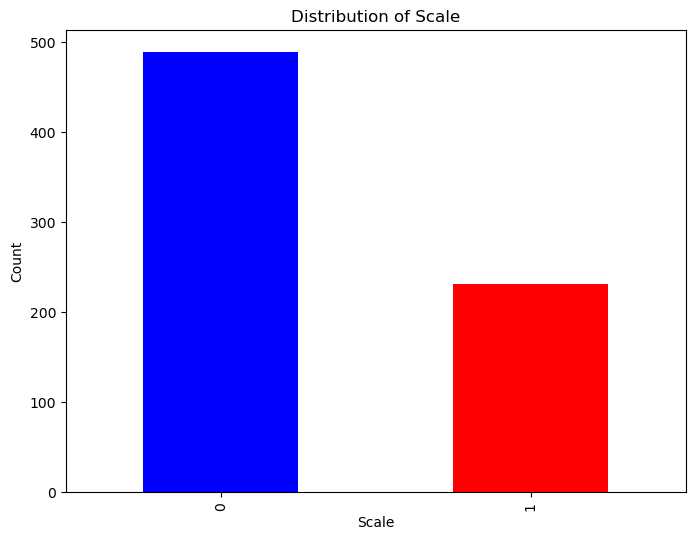

In [9]:
scale_counts = df['SCALE'].value_counts()

colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
scale_counts.plot(kind='bar', color=colors)

plt.xlabel('Scale')
plt.ylabel('Count')
plt.title('Distribution of Scale')
plt.show()

Target variable 'Scale' to be a binary varialbe, 'Non-Defective' as 0 and 'Defective' as 1

In [11]:
df.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

The following variables are excluded from the dataset for the reasons specified:

- PLATE_NO (Considered unnecessary as it is a unique ID)
- ROLLING_DATE (Not necessary to split further by time, as the data is from 8/1-2)

In [13]:
df.drop(columns=['PLATE_NO', 'ROLLING_DATE'], inplace=True)
df.head()

SCALE        SPEC STEEL_KIND  PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO  \
0      0  AB/EH32-TM         T1   32.25     3707   15109   14180       1   
1      0  AB/EH32-TM         T1   32.25     3707   15109   14180       1   
2      0   NV-E36-TM         T8   33.27     3619   19181   18130       2   
3      0   NV-E36-TM         T8   33.27     3619   19181   18130       2   
4      0  BV-EH36-TM         T8   38.33     3098   13334   12430       3   

   FUR_NO_ROW  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
0           1         1144          116         1133           59       282   
1           2         1144          122         1135           53       283   
2           1         1129          116         1121           55       282   
3           2         1152          125         1127           68       316   
4           1         1140          134         1128           48       314   

   FUR_EXTEMP  ROLLING_TEMP_T5      HSB  ROLLING_DESCALING  WORK_GR  
0        1125              934  applied                  8        2  
1        1120              937  applied                  8        2  
2        1106              889  applied                  8        3  
3        1113              885  applied                  8        3  
4        1118              873  applied                  8        1

### Outliers

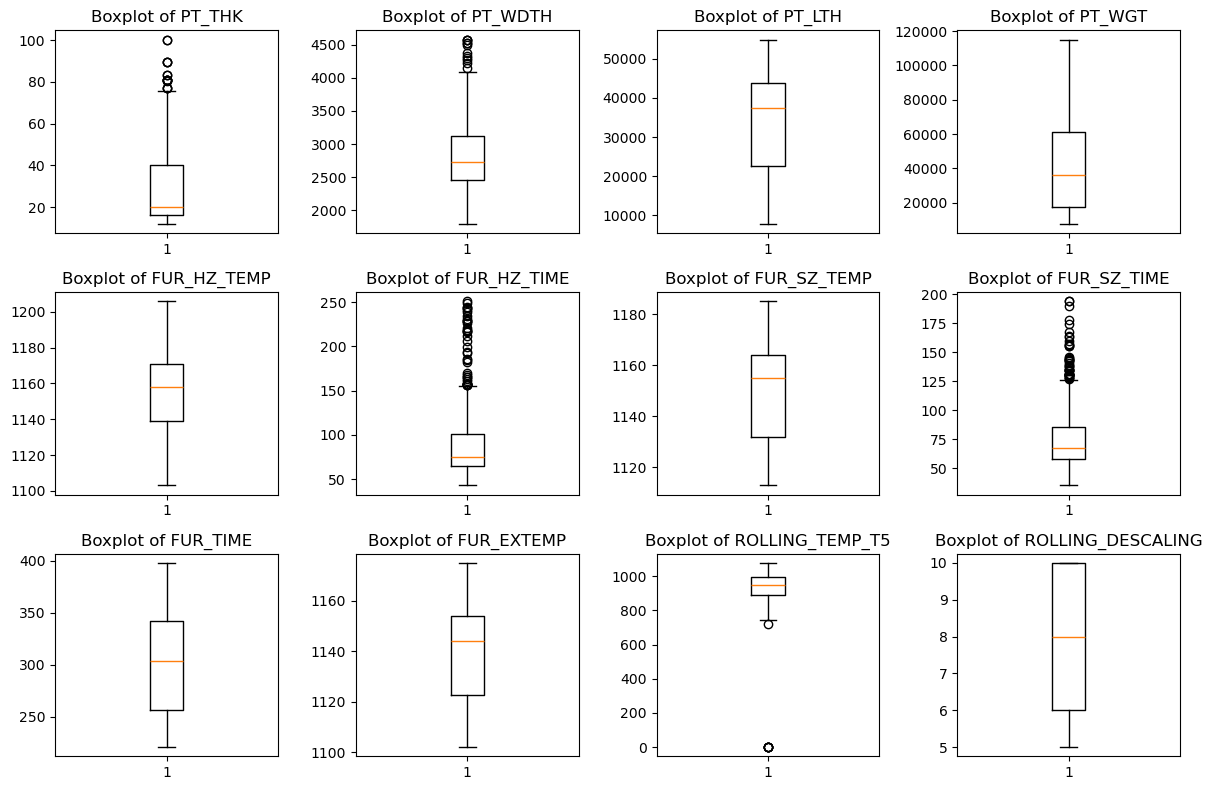

In [15]:
variables = ['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
             'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']

# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
axes = axes.flatten()

for i, variable in enumerate(variables):
    axes[i].boxplot(df[variable])
    axes[i].set_title(f"Boxplot of {variable}")

plt.tight_layout()

plt.show()

In [16]:
df['ROLLING_TEMP_T5'].describe()

count     720.000000
mean      933.920833
std       107.863887
min         0.000000
25%       889.750000
50%       951.000000
75%       994.250000
max      1078.000000
Name: ROLLING_TEMP_T5, dtype: float64

In [17]:
df['SPEC'].describe()

count            720
unique            66
top       JS-SM490YB
freq              84
Name: SPEC, dtype: object

In [18]:
df[df['ROLLING_TEMP_T5']==0]

SCALE        SPEC STEEL_KIND  PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO  \
41       0   GL-E36-TM         T8   55.51     3765   11398   37400       3   
184      0  JS-SM490YB         C0   16.09     2221   43596   61150       3   
185      0  JS-SM490YB         C0   16.09     2221   43596   61150       3   
494      0  PILAC-BT33         T5   80.82     2085   12919   17090       2   
495      0  PILAC-BT33         T5   80.82     2085   13176   17430       1   
496      0   NV-D32-TM         T0   40.35     2497   23592   37320       3   

     FUR_NO_ROW  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
41            2         1132           95         1128           80       341   
184           1         1169           64         1164           61       308   
185           2         1163           57         1166           67       303   
494           1         1133           89         1122           59       378   
495           2         1130           92         1124           61       362   
496           1         1119          109         1117           76       383   

     FUR_EXTEMP  ROLLING_TEMP_T5      HSB  ROLLING_DESCALING  WORK_GR  
41         1123                0  applied                  6        1  
184        1155                0  applied                 10        3  
185        1158                0  applied                 10        4  
494        1112                0  applied                  6        2  
495        1116                0  applied                  6        3  
496        1107                0  applied                  6        3

In the ROLLING_TEMP_T5 variable, 0 values were observed, which seemed unusual. Therefore, I replaced them with the mean value of SPEC.

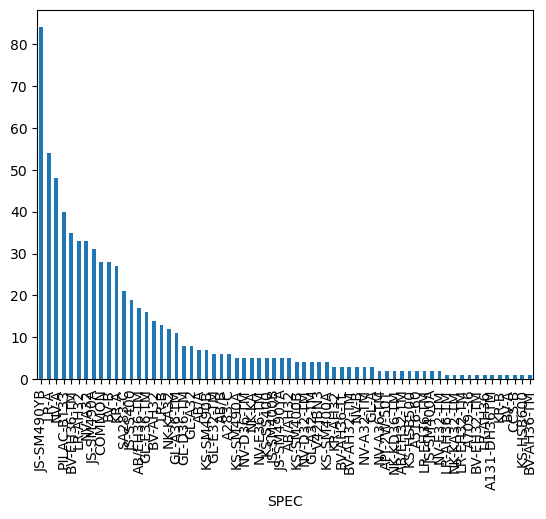

In [20]:
# Plotting a bar plot for the 'SPEC' column
df['SPEC'].value_counts().plot(kind='bar')

# Display the plot
plt.show()

In [21]:
# Group by 'SPEC' and calculate the mean of 'ROLLING_TEMP_T5' for each group
spec_mean = df.groupby('SPEC')['ROLLING_TEMP_T5'].transform('mean')

# Replace the 0 values in 'ROLLING_TEMP_T5' with the mean value of the corresponding 'SPEC'
df['ROLLING_TEMP_T5'] = df.apply(lambda row: spec_mean[row.name] if row['ROLLING_TEMP_T5'] == 0 else row['ROLLING_TEMP_T5'], axis=1)

# Check if the values are properly updated
# Print the value of row 40 (index 39, because indexing starts at 0)
print(df.iloc[39])
print()

# Print the value of row 496 (index 495, because indexing starts at 0)
print(df.iloc[495])

SCALE                         0
SPEC                 AB/EH36-TM
STEEL_KIND                   T8
PT_THK                    51.27
PT_WDTH                    3060
PT_LTH                    12407
PT_WGT                    15280
FUR_NO                        2
FUR_NO_ROW                    2
FUR_HZ_TEMP                1133
FUR_HZ_TIME                  93
FUR_SZ_TEMP                1127
FUR_SZ_TIME                  75
FUR_TIME                    330
FUR_EXTEMP                 1118
ROLLING_TEMP_T5           860.0
HSB                     applied
ROLLING_DESCALING             6
WORK_GR                       3
Name: 39, dtype: object

SCALE                         0
SPEC                 PILAC-BT33
STEEL_KIND                   T5
PT_THK                    80.82
PT_WDTH                    2085
PT_LTH                    13176
PT_WGT                    17430
FUR_NO                        1
FUR_NO_ROW                    2
FUR_HZ_TEMP                1130
FUR_HZ_TIME                  92
FUR_SZ_TEMP    

# EDA

### Histogram

In [24]:
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric.shape

(720, 16)

In [25]:
df_numeric_x = df_numeric.drop("SCALE", axis = 1)
df_numeric_y = df_numeric["SCALE"]
df_numeric_x.head()

PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO  FUR_NO_ROW  FUR_HZ_TEMP  \
0   32.25     3707   15109   14180       1           1         1144   
1   32.25     3707   15109   14180       1           2         1144   
2   33.27     3619   19181   18130       2           1         1129   
3   33.27     3619   19181   18130       2           2         1152   
4   38.33     3098   13334   12430       3           1         1140   

   FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  \
0          116         1133           59       282        1125   
1          122         1135           53       283        1120   
2          116         1121           55       282        1106   
3          125         1127           68       316        1113   
4          134         1128           48       314        1118   

   ROLLING_TEMP_T5  ROLLING_DESCALING  WORK_GR  
0            934.0                  8        2  
1            937.0                  8        2  
2            889.0                  8        3  
3            885.0                  8        3  
4            873.0                  8        1

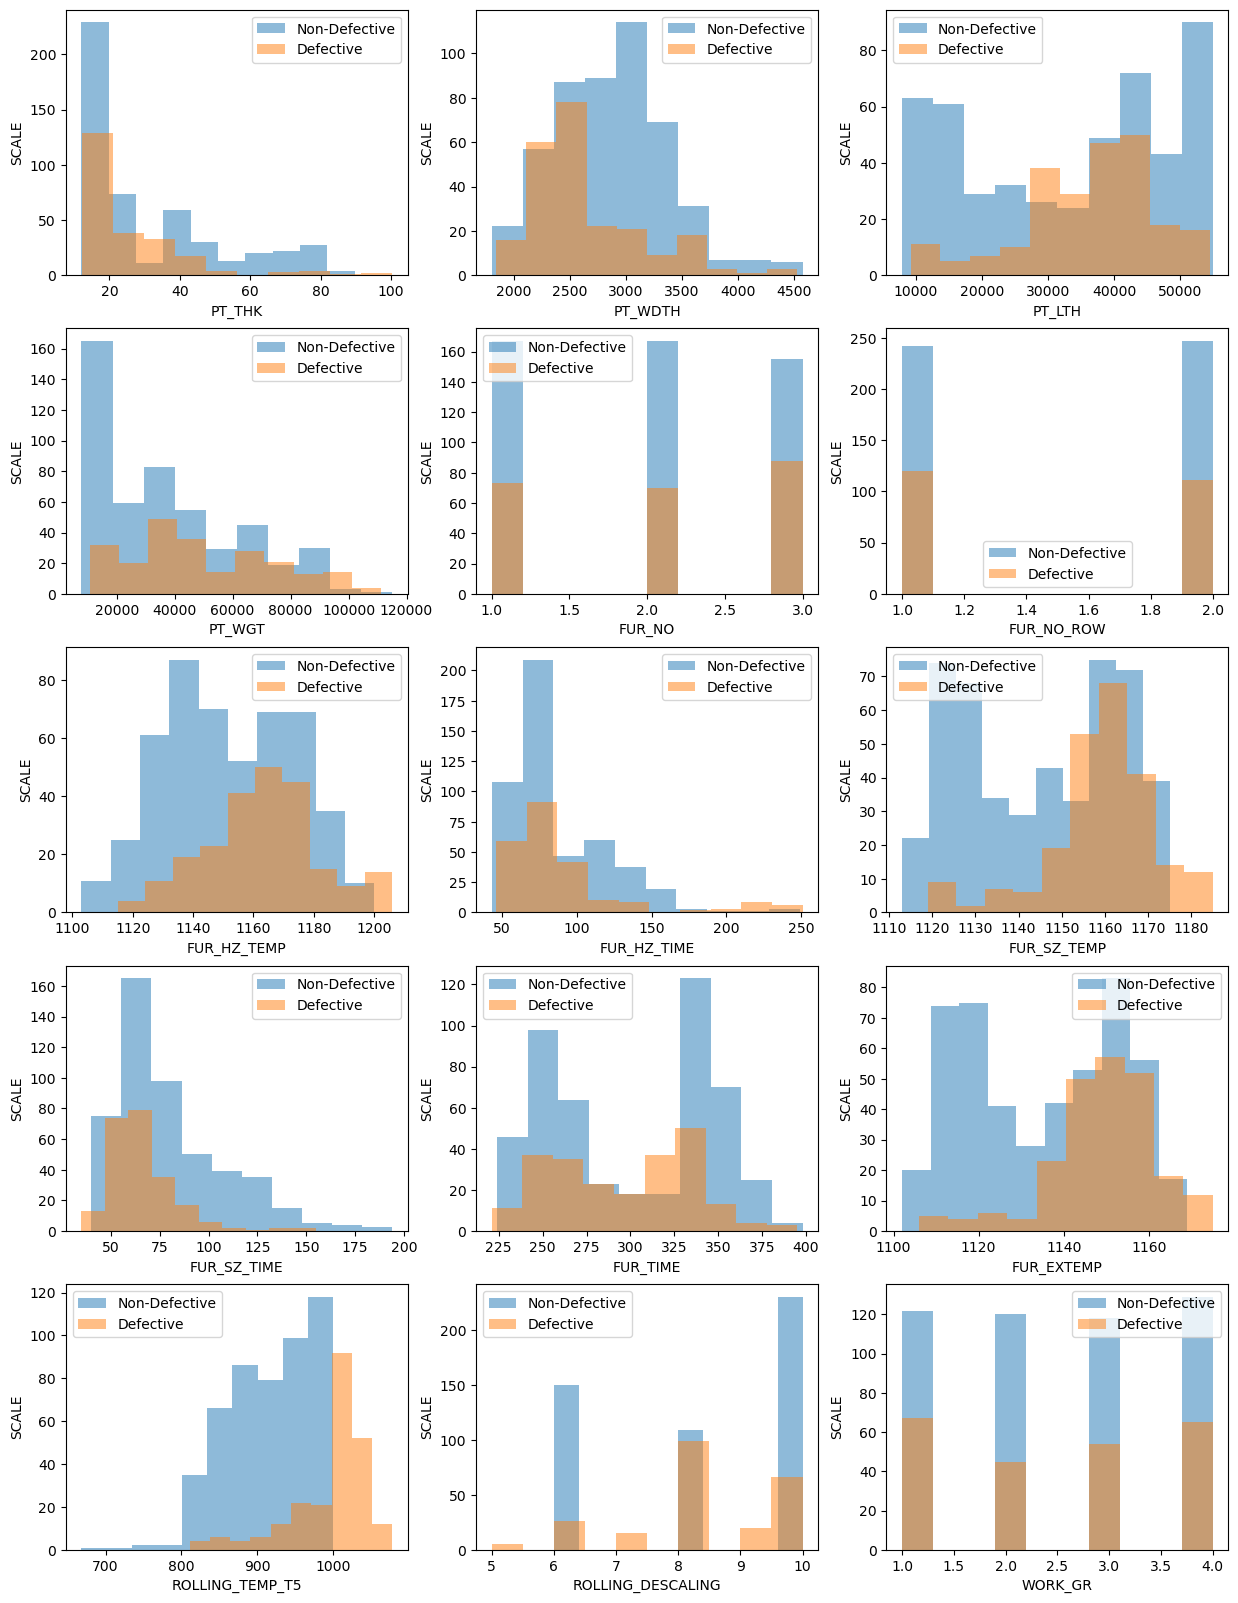

In [26]:
i = 0
fig = plt.figure(figsize = (15, 20))
columns = df_numeric_x.columns
for col in df_numeric_x.columns:
    plt.subplot(df_numeric_x.shape[1]//3, 3, i+1)
    i += 1
    plt.hist(df[df["SCALE"] == 0][col], label = "Non-Defective", alpha = 0.5)
    plt.hist(df[df["SCALE"] == 1][col], label = "Defective", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

### Relationship Between 'SCALE' and Other Variables

#### Steel Type

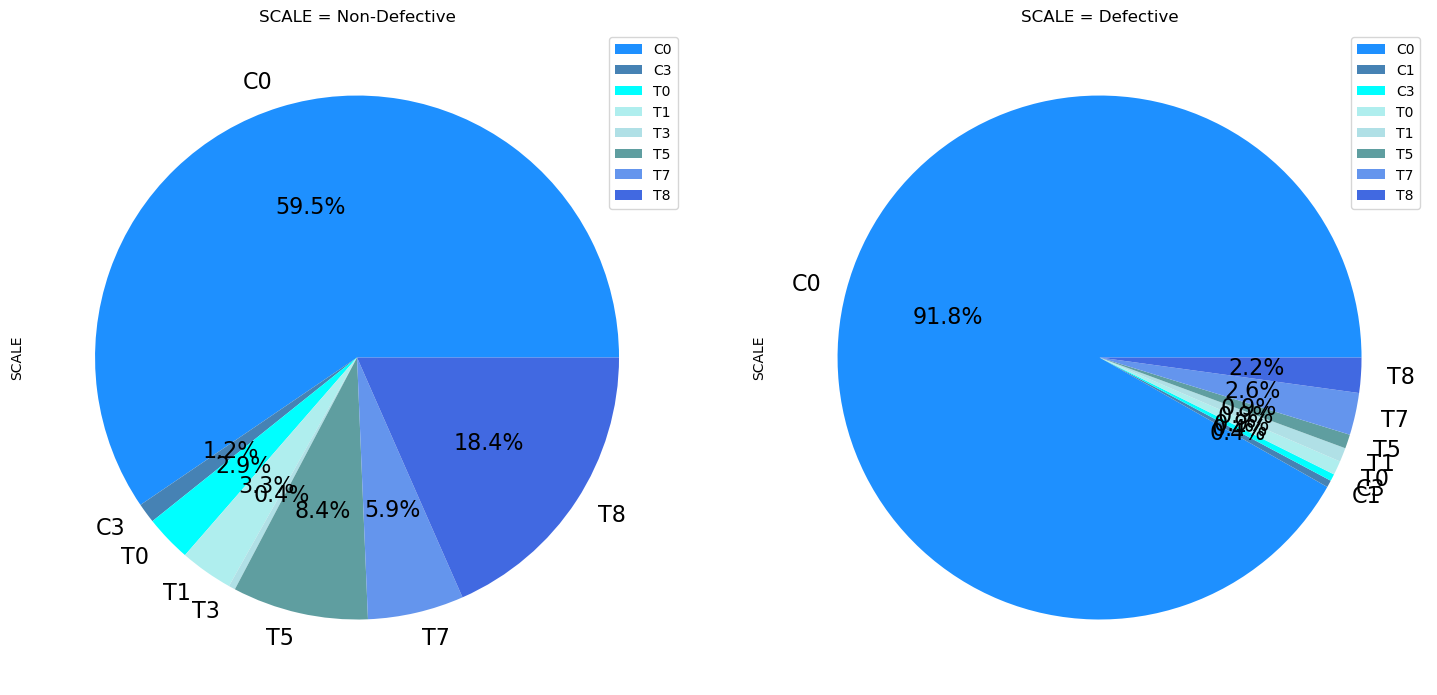

In [29]:
# Filter data for SCALE 0 and SCALE 1
df_SK_0 = df[df["SCALE"] == 0]
df_SK_1 = df[df["SCALE"] == 1]

# Group by 'STEEL_KIND' and count occurrences
df_count_0 = df_SK_0.groupby("STEEL_KIND", as_index=False).agg("count")
df_count_1 = df_SK_1.groupby("STEEL_KIND", as_index=False).agg("count")

# Set up the figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise', 'powderblue', 'cadetblue', 'cornflowerblue', 'royalblue', 'darkblue']

# Plot pie chart for SCALE 0
df_count_0.plot.pie(y="SCALE", labels=df_count_0["STEEL_KIND"], autopct="%.1f%%", radius=1, colors=colors, ax=axes[0], fontsize=16)
axes[0].set_title('SCALE = Non-Defective')

# Plot pie chart for SCALE 1
df_count_1.plot.pie(y="SCALE", labels=df_count_1["STEEL_KIND"], autopct="%.1f%%", radius=1, colors=colors, ax=axes[1], fontsize=16)
axes[1].set_title('SCALE = Defective')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [30]:
# Group by 'STEEL_KIND' and calculate the probability of SCALE = 1 for each group
df_SK_group1 = df.groupby("STEEL_KIND")["SCALE"].mean().reset_index()

# Rename the columns for clarity
df_SK_group1.columns = ["STEEL_KIND", "SCALE_PROB"]

# Convert SCALE_PROB to percentage
df_SK_group1["SCALE_PROB"] *= 100

df_SK_group1

STEEL_KIND  SCALE_PROB
0         C0   42.147117
1         C1  100.000000
2         C3   14.285714
3         T0   12.500000
4         T1   11.111111
5         T3    0.000000
6         T5    4.651163
7         T7   17.142857
8         T8    5.263158

Text(0, 0.5, 'SCALE')

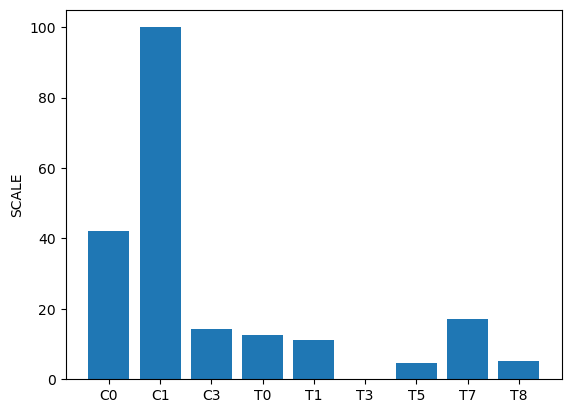

In [31]:
plt.bar(df_SK_group1.STEEL_KIND, df_SK_group1.SCALE_PROB)
plt.ylabel("SCALE")

#### Furness Number

#### Furness Number

<Axes: ylabel='SCALE'>

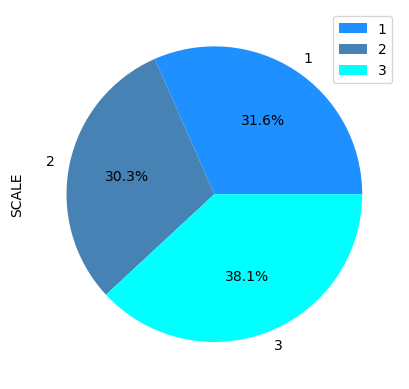

In [34]:
df_FN = df[df["SCALE"] == 1]
df_count = df_FN.groupby("FUR_NO", as_index = False).agg("count")
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise']

df_count.plot.pie(y="SCALE", labels = df_count["FUR_NO"], autopct="%.1f%%", radius = 1, colors = colors)

In [35]:
df.groupby("FUR_NO").count()

SCALE  SPEC  STEEL_KIND  PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO_ROW  \
FUR_NO                                                                         
1         240   240         240     240      240     240     240         240   
2         237   237         237     237      237     237     237         237   
3         243   243         243     243      243     243     243         243   

        FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
FUR_NO                                                                 
1               240          240          240          240       240   
2               237          237          237          237       237   
3               243          243          243          243       243   

        FUR_EXTEMP  ROLLING_TEMP_T5  HSB  ROLLING_DESCALING  WORK_GR  
FUR_NO                                                                
1              240              240  240                240      240  
2              237              237  237                237      237  
3              243              243  243                243      243

In [36]:
# Group by 'FUR_NO' and calculate the probability of SCALE = 1 for each group
df_FN_group1 = df.groupby("FUR_NO")["SCALE"].mean().reset_index()

# Rename the columns for clarity
df_FN_group1.columns = ["FUR_NO", "FUR_PROB"]

df_FN_group1["FUR_PROB"] *= 100

df_FN_group1

FUR_NO   FUR_PROB
0       1  30.416667
1       2  29.535865
2       3  36.213992

#### Working Group

<Axes: ylabel='SCALE'>

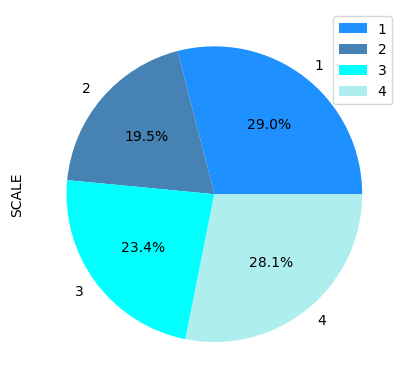

In [38]:
df_WG = df[df["SCALE"] == 1]
df_count = df_WG.groupby("WORK_GR", as_index = False).agg("count")
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise']

df_count.plot.pie(y="SCALE", labels = df_count["WORK_GR"], autopct="%.1f%%", radius = 1, colors = colors)

In [39]:
# Group by 'WORK_GR' and calculate the probability of SCALE = 1 for each group
df_WG_group1 = df.groupby("WORK_GR")["SCALE"].mean().reset_index()

# Rename the columns for clarity
df_WG_group1.columns = ["WORK_GR", "WG_PROB"]

df_WG_group1["WG_PROB"] *= 100

df_WG_group1

WORK_GR    WG_PROB
0        1  35.449735
1        2  27.272727
2        3  31.395349
3        4  33.505155

In [40]:
from scipy.stats import f_oneway

# Perform One-Way ANOVA to check for significant difference between WORK_GR groups
work_gr_groups = [df[df['WORK_GR'] == group]['SCALE'] for group in df['WORK_GR'].unique()]

# ANOVA test
f_stat, p_value = f_oneway(*work_gr_groups)

# Print the ANOVA result
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than 0.05 (significant)
if p_value < 0.05:
    print("There is a statistically significant difference between WORK_GR groups.")
else:
    print("There is no statistically significant difference between WORK_GR groups.")

F-statistic: 0.9827921566698729
P-value: 0.40028114545320315
There is no statistically significant difference between WORK_GR groups.


#### HSB

In [42]:
df_w1 = df.groupby("HSB")["SCALE"].mean().reset_index()

df_w1.columns = ["HSB", "HSB_PROB"]

df_w1["HSB_PROB"] *= 100

df_w1

HSB    HSB_PROB
0      applied   28.820961
1  not applied  100.000000

The defect rate was examined based on the application of HSB. As a result, it was found that when HSB was not applied, the defect rate occurred with a 100% probability.

In [44]:
df.columns

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP',
       'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB',
       'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

### Pair Plot

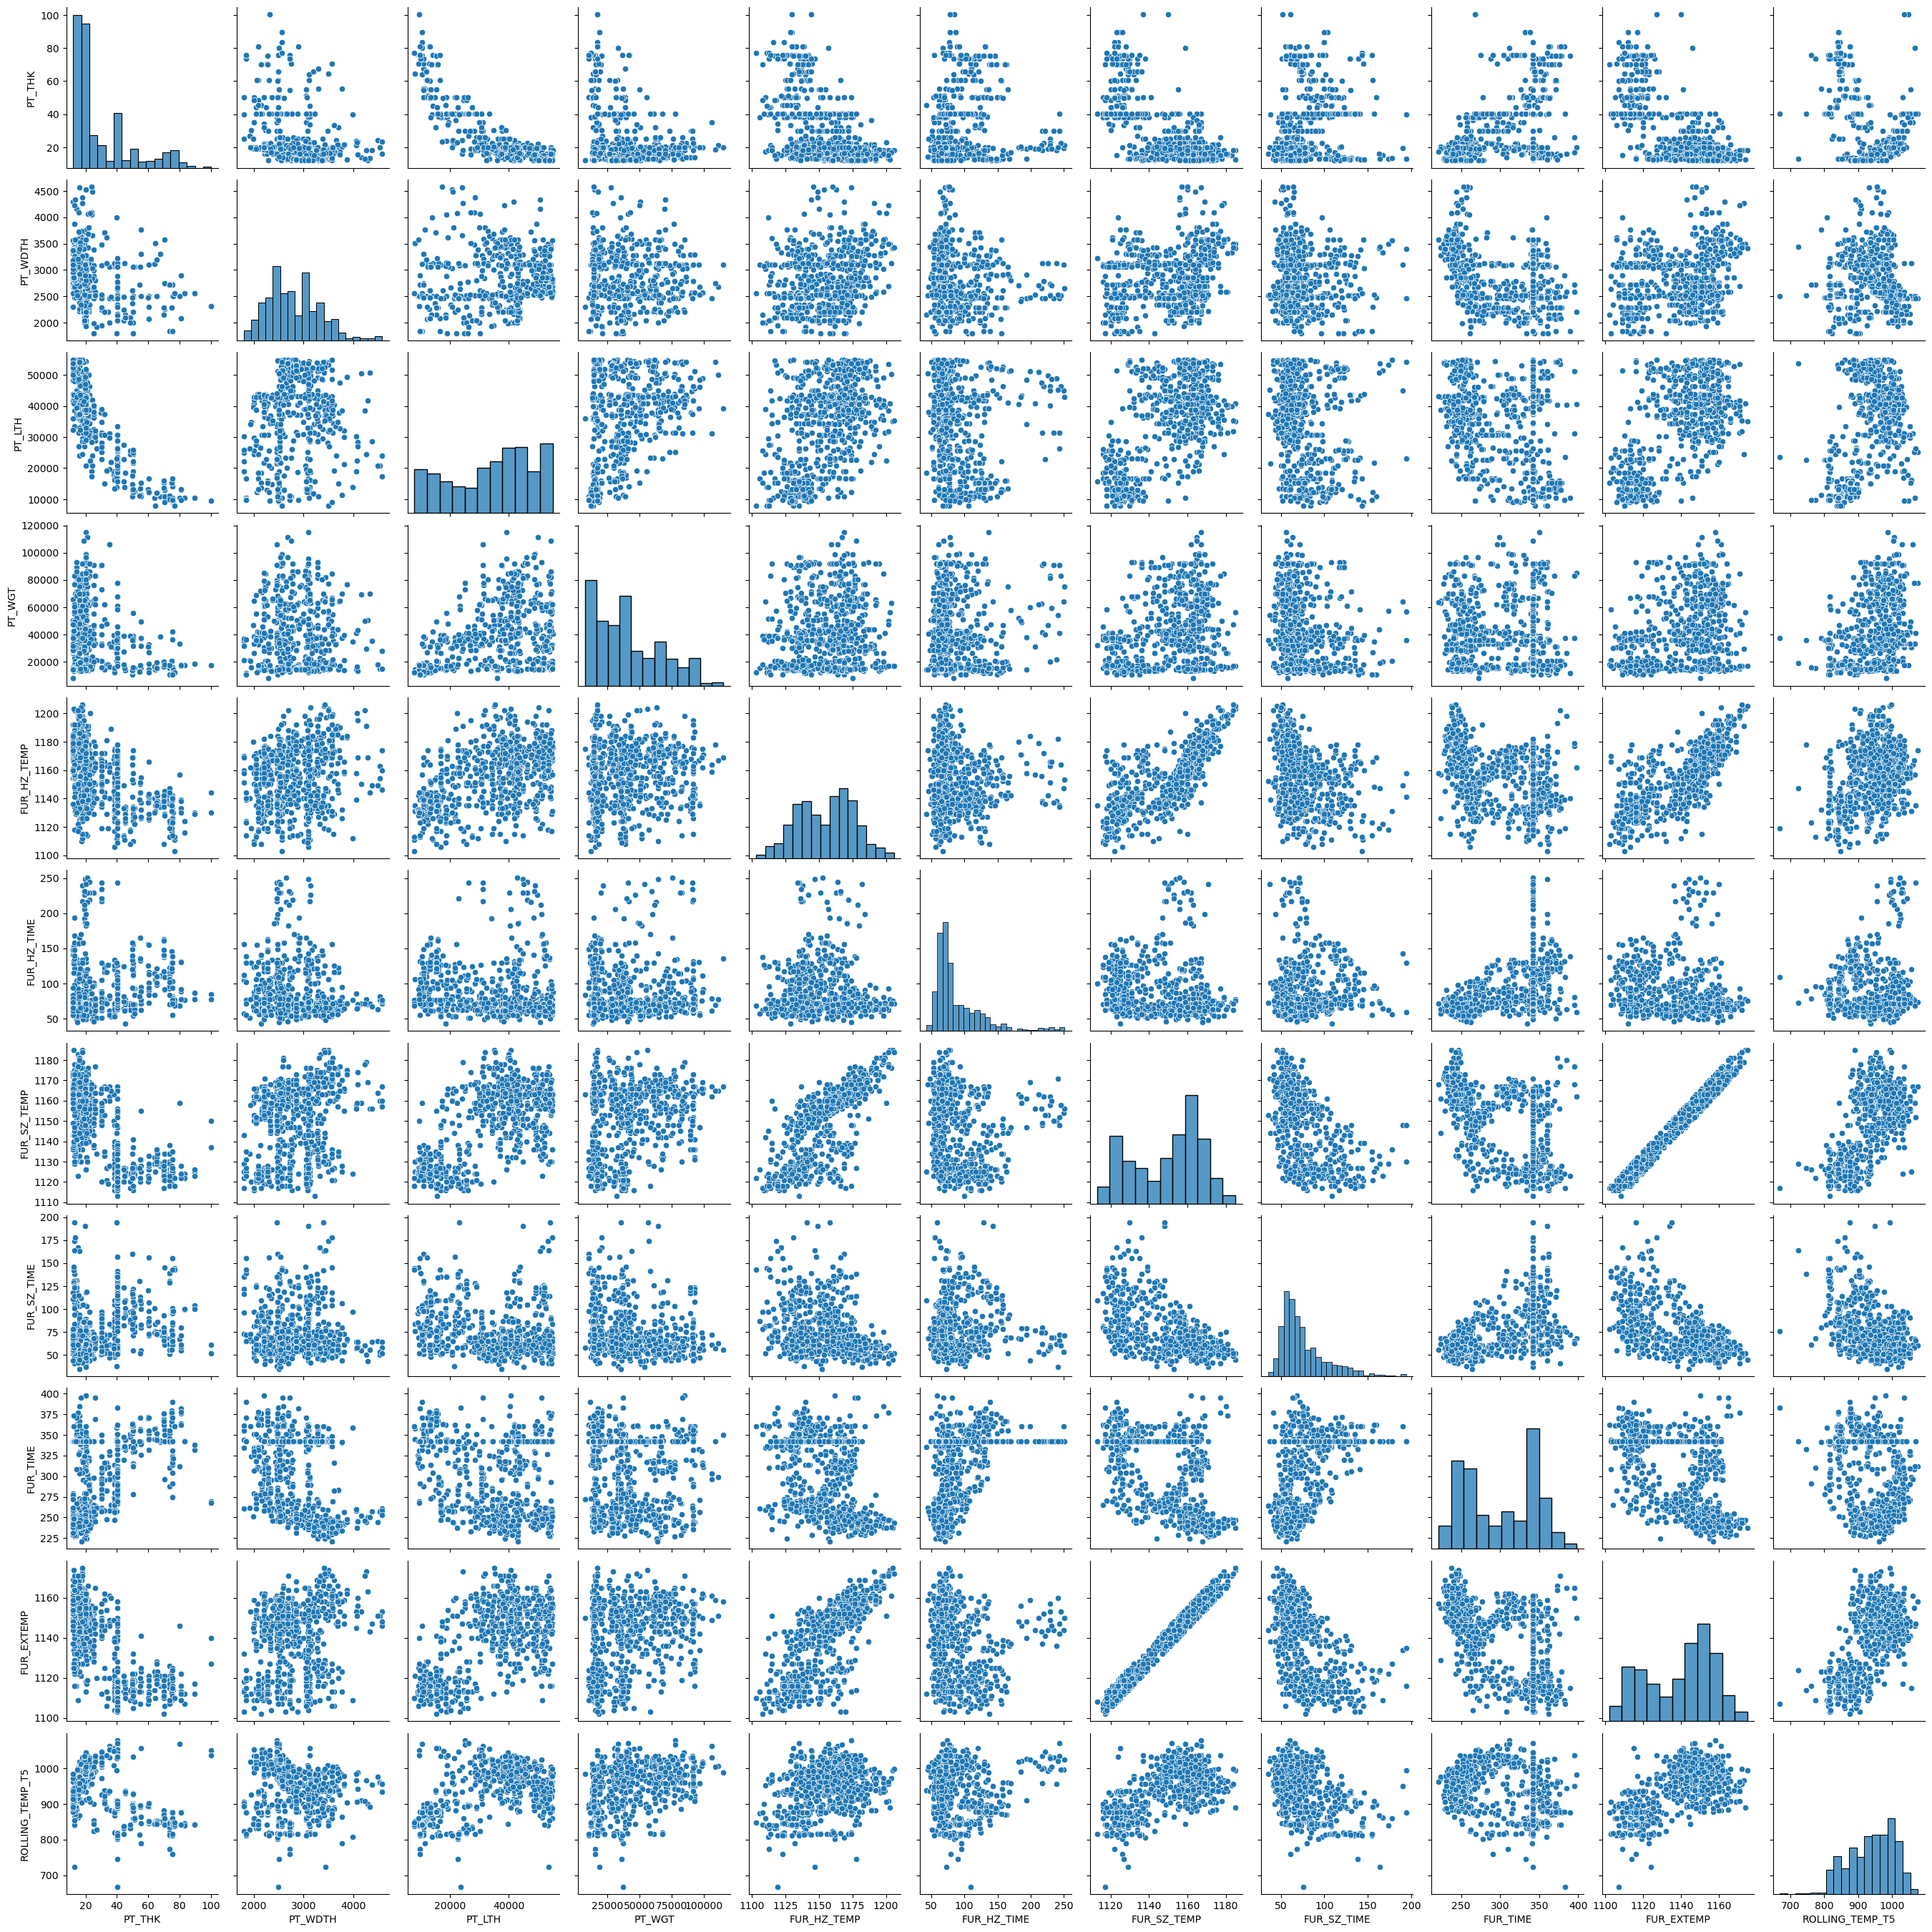

In [46]:
variables = ['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 
             'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5']

sns.pairplot(df[variables])
plt.show()

The scatter plot graph above suggests a positive linear relationship between the furnace soak temperature(FUR_SZ_TEMP) and the furnace extraction temperature (FUR_EXTEMP). In other words, as the furnace soak temperature increases, the furnace extraction temperature is expected to rise as well.  

A strong linear relationship indicates that when one variable increases, the other may also be affected. Therefore, I plan to revisit the correlation between variables using a heatmap and take appropriate actions based on the findings.

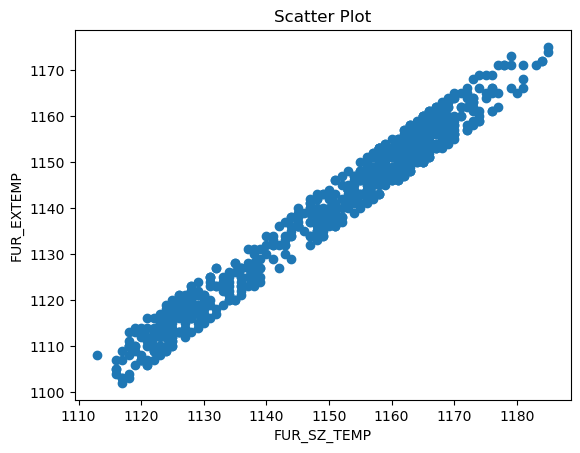

In [48]:
plt.scatter(df['FUR_SZ_TEMP'], df['FUR_EXTEMP'])
plt.xlabel('FUR_SZ_TEMP')
plt.ylabel('FUR_EXTEMP')
plt.title('Scatter Plot')
plt.show()

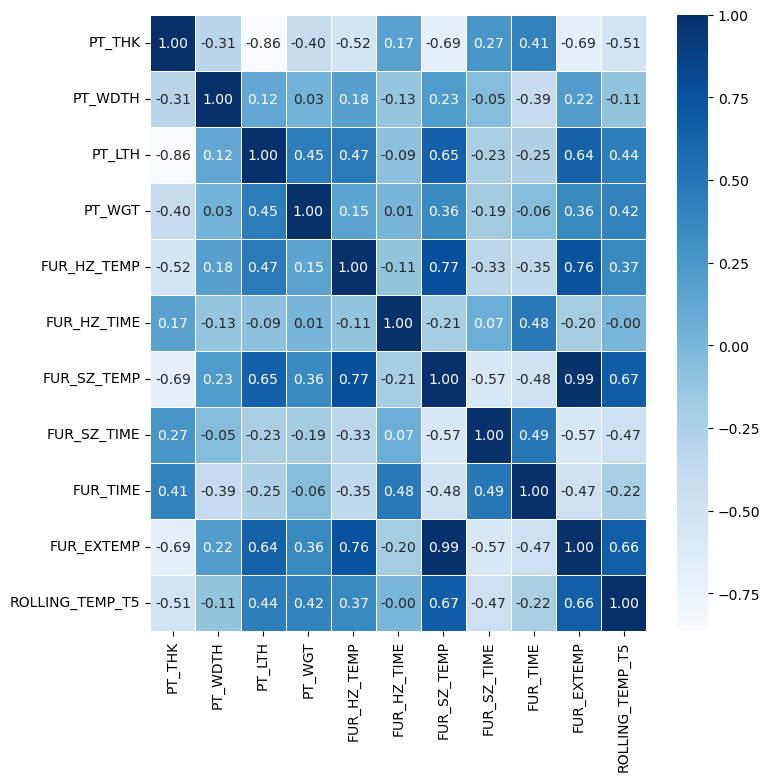

In [49]:
# Filter the DataFrame for numeric columns to ensure correlation can be computed
numeric_df = df[variables].select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data=numeric_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In the heatmap, a correlation of 0.99 is observed between FUR_SZ_TEMP (crack zone material temperature) and FUR_EXTEMP (furnace extraction temperature). This suggests that there is an interdependent relationship between these two variables based on furnace operating conditions.

Let’s examine the correlations between other variables:

A negative correlation is observed between PT_THK (plate thickness) and both PT_LTH and PT_WGT. This implies that as the thickness of the steel increases, the length and width tend to decrease.  
A negative correlation is observed between PT_THK and ROLLING_DESCALING. This indicates that thicker steel generally requires fewer descaling operations.  
Conversely, a strong positive correlation is observed between PT_WDTH and ROLLING_DESCALING, as well as PT_LTH and ROLLING_DESCALING. This suggests that wider or longer products may require more descaling operations.  
Based on these findings, we decided to remove one of the two variables: FUR_SZ_TEMP and FUR_EXTEMP. Since they show a perfect positive linear relationship, retaining both in the model could cause multicollinearity issues.  

To make an informed decision about which variable to remove, we researched relevant domain knowledge and decided to remove FUR_EXTEMP (furnace extraction temperature).  

The FUR_SZ_TEMP (crack zone material temperature) is critical in controlling crack formation and growth during the heating process of the steel plate in the furnace. Cracks can occur due to plastic deformation at weld joints, oxidation, and incomplete removal of insulating materials, which is one of the primary causes of scale defects.  

On the other hand, FUR_EXTEMP refers to the temperature of the steel plate when it is extracted from the furnace after the heating process. While it affects the heat treatment outcome of the steel, it does not directly influence scale defect occurrence. Additionally, it mainly reflects the final temperature of the steel, which impacts subsequent processes and product quality, but it is not directly linked to scale defects.  

Therefore, we decided to remove FUR_EXTEMP to avoid the potential issues related to multicollinearity in our model.

In [51]:
df.drop('FUR_EXTEMP', axis=1, inplace=True)

### Chi-Square Test

Understanding the Relationship Between Target Variable (Categorical) and Explanatory Variable (Categorical)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    int64  
 8   FUR_NO_ROW         720 non-null    int64  
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  ROLLING_TEMP_T5    720 non-null    float64
 15  HSB                720 non-null    object 
 16  ROLLING_DESCALING  720 non

In [55]:
from scipy.stats import chi2_contingency

categorical_var = ['STEEL_KIND', 'FUR_NO', 'HSB', 'ROLLING_DESCALING', 'WORK_GR']

for var in categorical_var:
    contingency_table = pd.crosstab(df[var], df['SCALE'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Variable: {var}")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("\n")

Variable: STEEL_KIND
Chi-square statistic: 83.70481294417606
P-value: 8.754375220184464e-15


Variable: FUR_NO
Chi-square statistic: 2.9145797756498975
P-value: 0.2328665147101705


Variable: HSB
Chi-square statistic: 69.9825610279413
P-value: 5.983107800489513e-17


Variable: ROLLING_DESCALING
Chi-square statistic: 144.8596521881519
P-value: 1.6570240858564916e-29


Variable: WORK_GR
Chi-square statistic: 2.9526891330221634
P-value: 0.39897724814139857




The Chi-Square test results show that STEEL_KIND, HSB, ROLLING_DESCALING, and WORK_GR are significantly related to the scale variable, while FUR_NO shows no significant relationship with scale.

# Machine Learning Models

## 1) Clustering

### K-Means Clustering

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features
features = df[['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
               'FUR_TIME', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']]
features_scaled = StandardScaler().fit_transform(features)

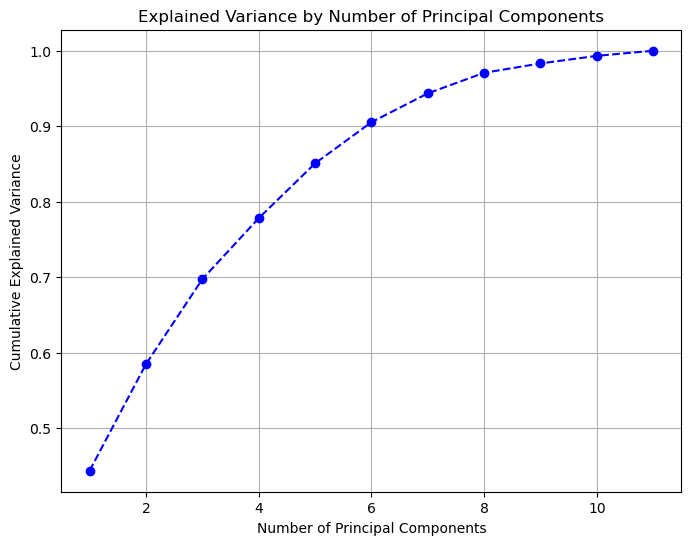

In [61]:
# Perform PCA with all components
pca = PCA()
pca.fit(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


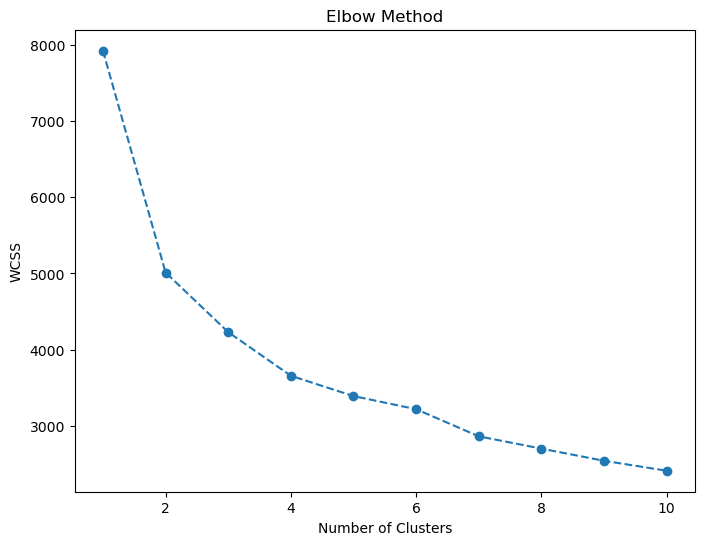

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Test cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


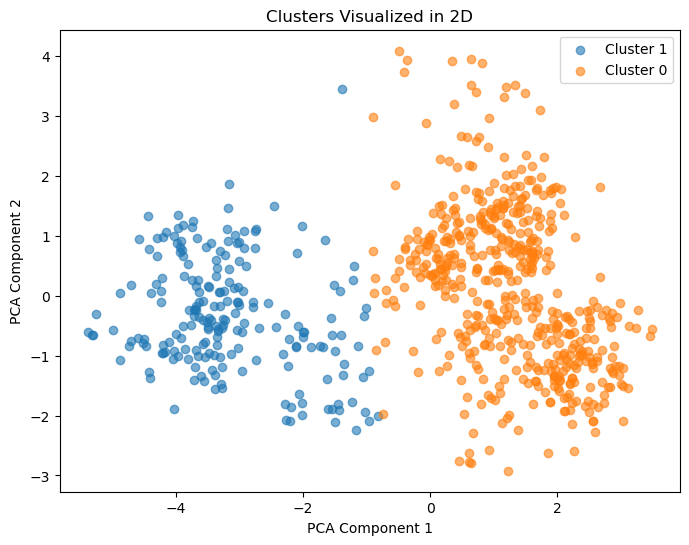

In [63]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Perform PCA to reduce to 2 dimensions
pca_2d = PCA(n_components=2)
reduced_features = pca_2d.fit_transform(features_scaled)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Add PCA components to the dataframe
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Clusters Visualized in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [64]:
# Summary statistics of features by cluster
cluster_summary = df.groupby('Cluster')[['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
               'FUR_TIME', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']].mean()
print(cluster_summary)

            PT_THK      PT_WDTH        PT_LTH        PT_WGT  FUR_HZ_TEMP  \
Cluster                                                                    
0        19.177571  2870.724272  41265.007767  48699.766990  1162.376699   
1        54.616624  2647.360976  16884.268293  23348.780488  1137.658537   

         FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME    FUR_TIME  ROLLING_TEMP_T5  \
Cluster                                                                       
0          84.456311  1158.877670    68.052427  288.827184       970.887841   
1          97.619512  1126.526829    93.614634  330.048780       865.696159   

         ROLLING_DESCALING  
Cluster                     
0                 9.097087  
1                 6.365854  


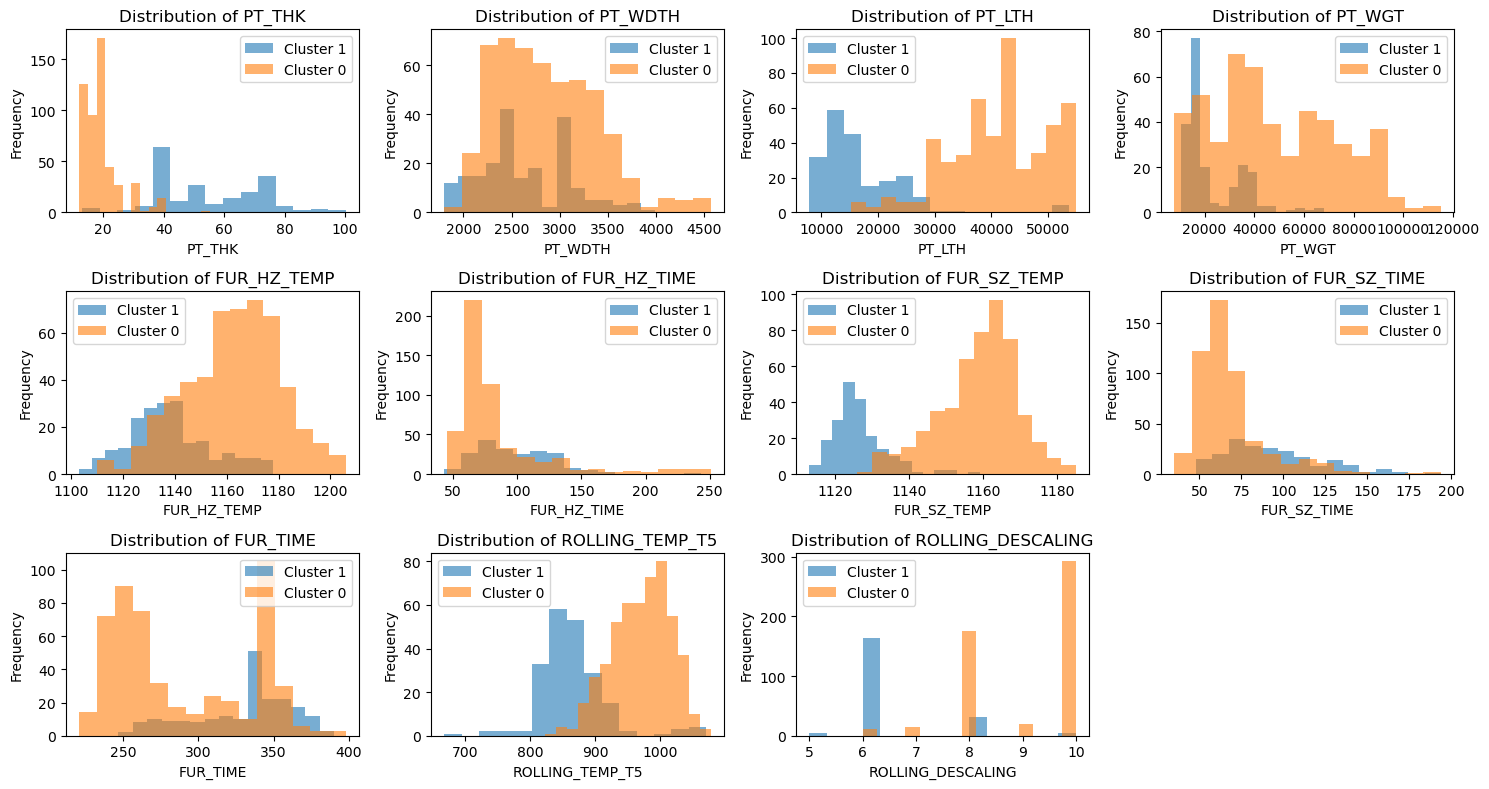

In [65]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.hist(cluster_data[feature], alpha=0.6, label=f'Cluster {cluster}', bins=15)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


In [66]:
# Calculate the count of rows in each cluster
cluster_counts = df.groupby('Cluster').size()
cluster_counts

Cluster
0    515
1    205
dtype: int64

In [67]:
# Calculate the count of rows in each cluster
cluster_counts = df.groupby('Cluster').size()

# Calculate the count of rows where SCALE == 0 in each cluster
scale_0_counts = df[df['SCALE'] == 0].groupby('Cluster').size()

# Calculate the percentage of SCALE == 0 for each cluster
scale_0_percentage = (scale_0_counts / cluster_counts) * 100

# Filter percentages for clusters 0 and 1
scale_0_percentage_filtered = scale_0_percentage.loc[[0, 1]]

# Display results
print(scale_0_percentage_filtered)


Cluster
0    59.029126
1    90.243902
dtype: float64


## 2) Classification

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import graphviz

### Decision Tree

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df_dummy = pd.get_dummies(df)

df_y = df_dummy["SCALE"]
df_x = df_dummy.drop("SCALE", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 94)
train data Y size : (504,)
test data X size : (216, 94)
test data Y size : (216,)


In [72]:
param_grid = {'criterion' : ['gini','entropy'],'max_depth' : [i for i in range(1, 11, 1)], 'min_samples_leaf': [i*10 for i in range(1, 6, 1)]}
train_accuracy = []; test_accuracy = [];
param_criterion = []; param_depth = [];

#for criterion in list_criterion:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(df_train_x, df_train_y)
train_accuracy.append(tree.score(df_train_x, df_train_y))
test_accuracy.append(tree.score(df_test_x, df_test_y))
print(tree.best_params_)

tree_train_acc = tree.score(df_train_x, df_train_y)
tree_test_acc = tree.score(df_test_x, df_test_y)
tree_f1_score = f1_score(df_test_y, tree.predict(df_test_x))

df_gridsearch = pd.DataFrame()
df_gridsearch['TrainAccuracy'] = train_accuracy
df_gridsearch['TestAccuracy'] = test_accuracy
df_gridsearch

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


TrainAccuracy  TestAccuracy
0       0.980159      0.990741

In [73]:
tree_final = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=1234)

In [74]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

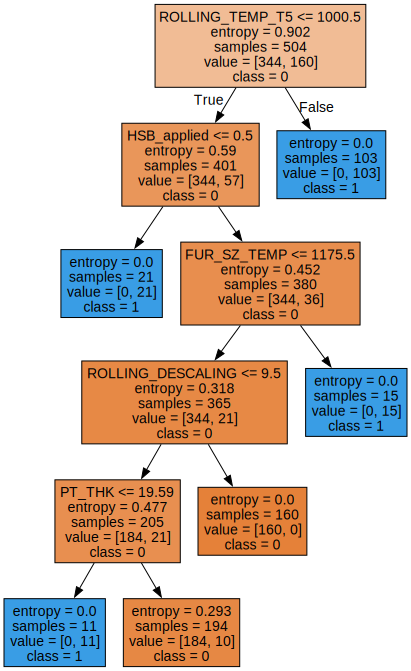

In [75]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names=["0", "1"],
               feature_names=df_train_x.columns, impurity=True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [76]:
df_feature_importance = pd.DataFrame()
df_feature_importance["Feature"] = df_train_x.columns
df_feature_importance["Importance"] = tree_final.feature_importances_
df_feature_importance.sort_values("Importance", ascending = False, inplace = True)
df_feature_importance.round(3)

Feature  Importance
11    ROLLING_TEMP_T5       0.548
92        HSB_applied       0.163
8         FUR_SZ_TEMP       0.141
0              PT_THK       0.103
12  ROLLING_DESCALING       0.046
..                ...         ...
31    SPEC_BV-AH36-TM       0.000
30    SPEC_BV-AH36-TL       0.000
29    SPEC_BV-AH32-TM       0.000
28       SPEC_BV-AH32       0.000
93    HSB_not applied       0.000

[94 rows x 2 columns]

In [77]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.991
Confusion matrix: 
[[145   0]
 [  2  69]]
              precision    recall  f1-score   support

           0      0.986     1.000     0.993       145
           1      1.000     0.972     0.986        71

    accuracy                          0.991       216
   macro avg      0.993     0.986     0.989       216
weighted avg      0.991     0.991     0.991       216



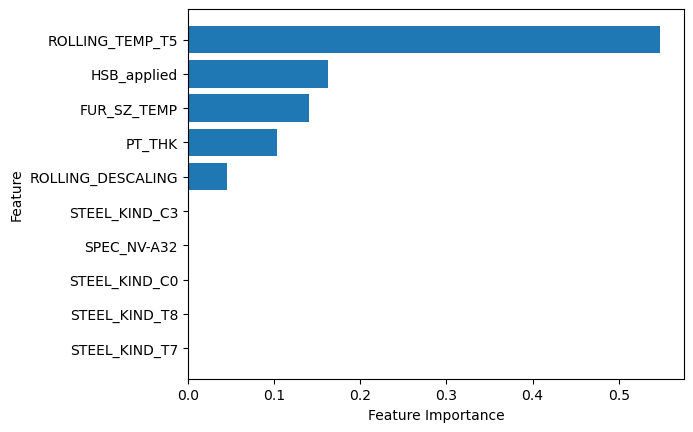

In [78]:
# Sort the features by importance in ascending order
df_feature_importance.sort_values("Importance", ascending=True, inplace=True)

# Select the top 5 most important features
df_importance_top5 = df_feature_importance.tail(10)

# Plot the horizontal bar chart for the top 5 features
coordinates = range(len(df_importance_top5))
plt.barh(y=coordinates, width=df_importance_top5["Importance"])
plt.yticks(coordinates, df_importance_top5["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

plt.show()

In [79]:
gb_uncustomized = GradientBoostingClassifier(random_state=464)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 1.000


### SVM

In [81]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

SCALE  PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO  FUR_NO_ROW  FUR_HZ_TEMP  \
0      0   32.25     3707   15109   14180       1           1         1144   
1      0   32.25     3707   15109   14180       1           2         1144   
2      0   33.27     3619   19181   18130       2           1         1129   
3      0   33.27     3619   19181   18130       2           2         1152   
4      0   38.33     3098   13334   12430       3           1         1140   

   FUR_HZ_TIME  FUR_SZ_TEMP  ...  STEEL_KIND_C1  STEEL_KIND_C3  STEEL_KIND_T0  \
0          116         1133  ...          False          False          False   
1          122         1135  ...          False          False          False   
2          116         1121  ...          False          False          False   
3          125         1127  ...          False          False          False   
4          134         1128  ...          False          False          False   

   STEEL_KIND_T1  STEEL_KIND_T3  STEEL_KIND_T5  STEEL_KIND_T7  STEEL_KIND_T8  \
0           True          False          False          False          False   
1           True          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False           True   
4          False          False          False          False           True   

   HSB_applied  HSB_not applied  
0         True            False  
1         True            False  
2         True            False  
3         True            False  
4         True            False  

[5 rows x 95 columns]

In [82]:
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["SCALE"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [83]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.683
Accuracy on test set: 0.671


In [84]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

PT_THK   PT_WDTH    PT_LTH    PT_WGT    FUR_NO  FUR_NO_ROW  FUR_HZ_TEMP  \
0  0.155812  1.738951 -1.390441 -1.103810 -1.226038   -0.994460    -0.543782   
1  0.155812  1.738951 -1.390441 -1.103810 -1.226038    1.005571    -0.543782   
2  0.209106  1.568896 -1.095771 -0.944112 -0.005087   -0.994460    -1.263141   
3  0.209106  1.568896 -1.095771 -0.944112 -0.005087    1.005571    -0.160124   
4  0.473482  0.562094 -1.518889 -1.174562  1.215864   -0.994460    -0.735611   

   FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  ...  STEEL_KIND_C1  STEEL_KIND_C3  \
0     0.767342    -0.949149    -0.626453  ...      -0.037294      -0.099084   
1     0.932981    -0.835252    -0.856618  ...      -0.037294      -0.099084   
2     0.767342    -1.632537    -0.779897  ...      -0.037294      -0.099084   
3     1.015800    -1.290843    -0.281206  ...      -0.037294      -0.099084   
4     1.264257    -1.233894    -1.048422  ...      -0.037294      -0.099084   

   STEEL_KIND_T0  STEEL_KIND_T1  STEEL_KIND_T3  STEEL_KIND_T5  STEEL_KIND_T7  \
0      -0.150756       6.244998      -0.052778      -0.252023      -0.226042   
1      -0.150756       6.244998      -0.052778      -0.252023      -0.226042   
2      -0.150756      -0.160128      -0.052778      -0.252023      -0.226042   
3      -0.150756      -0.160128      -0.052778      -0.252023      -0.226042   
4      -0.150756      -0.160128      -0.052778      -0.252023      -0.226042   

   STEEL_KIND_T8  HSB_applied  HSB_not applied  
0      -0.389872     0.219169        -0.219169  
1      -0.389872     0.219169        -0.219169  
2       2.564946     0.219169        -0.219169  
3       2.564946     0.219169        -0.219169  
4       2.564946     0.219169        -0.219169  

[5 rows x 94 columns]

In [85]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [86]:
svm_scaled = SVC(random_state=0)
svm_final = svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.885
Accuracy on test set: 0.806


In [87]:
print("Training set class distribution:", df_train_y.value_counts())
print("Test set class distribution:", df_test_y.value_counts())

Training set class distribution: SCALE
0    344
1    160
Name: count, dtype: int64
Test set class distribution: SCALE
0    145
1     71
Name: count, dtype: int64


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'degree': [3, 4, 5]  # Degree of polynomial kernel (only for 'poly')
}

# Initialize the SVM model
svm = SVC(random_state=1234)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(df_scaled_train_x, df_train_y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Use the best estimator to make predictions on the test set
svm_best = grid_search.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.861


In [89]:
# Use the best parameters found from GridSearchCV to create the final SVM model
svm_final = SVC(C=1, degree=3, gamma='scale', kernel='linear', random_state=1234, class_weight='balanced')

# Fit the model to the scaled training data
svm_final.fit(df_scaled_train_x, df_train_y)

SVC(C=1, class_weight='balanced', kernel='linear', random_state=1234)

In [90]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_final, df_train_x, df_train_y, scoring="accuracy")
df_importance = pd.DataFrame({
    "Feature": df_train_x.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)
print(df_importance)

            Feature  Importance
0            PT_THK         0.0
59    SPEC_KS-SS400         0.0
68     SPEC_NK-KA32         0.0
67       SPEC_NK-KA         0.0
66  SPEC_LR-EH36-TM         0.0
..              ...         ...
29  SPEC_BV-AH32-TM         0.0
28     SPEC_BV-AH32         0.0
27        SPEC_BV-A         0.0
26  SPEC_API-2W-50T         0.0
93  HSB_not applied         0.0

[94 rows x 2 columns]


## Conclusion

In [92]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_final.feature_importances_
df_importance.sort_values(by="Importance",ascending=False, inplace = True)
df_importance[:6].round(3)

Feature  Importance
11    ROLLING_TEMP_T5       0.548
92        HSB_applied       0.163
8         FUR_SZ_TEMP       0.141
0              PT_THK       0.103
12  ROLLING_DESCALING       0.046
60          SPEC_LR-A       0.000

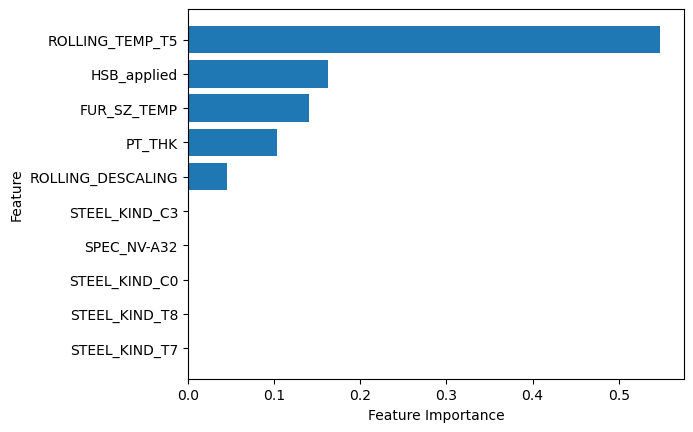

In [93]:
# Sort the features by importance in ascending order
df_importance.sort_values("Importance", ascending=True, inplace=True)

# Select the top 5 most important features
df_importance_top5 = df_importance.tail(10)

# Plot the horizontal bar chart for the top 5 features
coordinates = range(len(df_importance_top5))
plt.barh(y=coordinates, width=df_importance_top5["Importance"])
plt.yticks(coordinates, df_importance_top5["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

plt.show()

The feature importance for the Decision Tree is as follows:  

Rolling_TEMP_T5, HSB_applied, FUR_SZ_TEMP, PT_THK, ROLLING_DESCALING  

These features correspond to the heating furnace temperature, HSB application, heating furnace crack zone temperature, number of descaling operations during rolling, and plate thickness. During the EDA phase, the rolling temperature was excluded due to its perfect positive correlation with the heating furnace crack zone temperature. As a result, the rolling temperature can also be considered an important factor.

To reduce scale occurrence and improve process efficiency in the plate rolling process, the following measures are recommended, with a focus on balancing quality, cost, and energy efficiency:

- Lower the heating furnace temperature cautiously, ensuring that the material reaches the optimal rolling temperature to maintain product quality.
- Optimize HSB application based on specific plate characteristics to improve surface quality without negatively affecting material strength or equipment wear.
- Adjust the heating furnace crack zone temperature by carefully reducing it to minimize scale formation, while maintaining the necessary temperature distribution for effective rolling.
- Increase the frequency of descaling operations, but do so strategically to avoid excessive wear on equipment and unnecessary surface damage.
- Optimize plate thickness, considering specific product requirements and strength, while also taking into account scale formation risks.
